In [27]:
#import Counter from collections
from collections import Counter
import collections
from tqdm import tqdm

# %%
import warnings
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from xverse.ensemble import VotingSelector

pd.options.display.max_columns=999
pd.options.display.max_rows = 999

## KONFIGURASI PANDAS DAN PLOT ##
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.option_context("display.max_rows", 100)

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")

In [40]:
#### PART 1 ####

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

pd.options.display.max_columns=999
pd.options.display.max_rows = 999

#######################PLOTTING FUNCTION#######################

# set the style of the axes and the text color
plt.rcParams['figure.figsize'] = (12.0, 5.0)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("bright")

# A function to show boxplot and histogram (numeric features only)
def box_hist_plot_1(series, Title):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.suptitle(Title) 
  sns.boxplot(series, ax=ax_box,color="r")
  sns.distplot(series.dropna(), ax=ax_hist,color="r", kde=False)
  ax_box.set(xlabel='')
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax_hist.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()
    
# A function to show boxplot and histogram (numeric features only)
def box_hist_plot_2(series, Title):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.suptitle(Title) 
  sns.boxplot(series, ax=ax_box,color="b")
  sns.distplot(series.dropna(), ax=ax_hist,color="b", kde=False)
  ax_box.set(xlabel='')
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax_hist.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()

# A function to show boxplot and histogram in log scale
def box_hist_log_plot(series):
  try: 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    stats_describe = series.describe(percentiles=[.05, .25, .5, .75, .95])
    # Annotation for descriptive statistics of the data
    stats_desc = ""
    for idx in stats_describe.index.tolist():
      stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
    ax_hist.annotate(
      stats_desc, 
      xy=(1.01, 1), 
      xycoords='axes fraction', 
      verticalalignment='top',
      horizontalalignment='left'
    )
    
    s_new = np.log10(series)
    s_new[s_new == -np.inf] = np.nan
    IQR = s_new.quantile(0.75) - s_new.quantile(0.25) + 0.1
    s_range = s_new.max() - s_new.quantile(0.05)
    cube = np.cbrt(len(s_new))
    newBins = np.logspace(s_new.min(), s_new.max(), round(s_range/(2*IQR/cube)))
    
    sns.boxplot(series, ax=ax_box)
    sns.distplot(series.dropna(), bins=newBins, ax=ax_hist, kde=False)
    ax_box.set(xlabel='')
    ax_box.set(xscale="log")
    plt.show()
  except ValueError:
    pass

# A function to show boxplot and histogram for each feature by its label
def divided_box_hist_plot(series, y):
  labels = y.unique()
  gs_kw = dict(width_ratios=[.5, .5], height_ratios=[.15, .85])
  f, ax = plt.subplots(2, 2, sharex=True, gridspec_kw=gs_kw)
  sns.boxplot(series[y==labels[0]], color="red", ax=ax[0][0])
  sns.boxplot(series[y==labels[1]], color="blue", ax=ax[0][1])
  ax[0][0].set(xlabel="")
  ax[0][1].set(xlabel="")
  sns.distplot(series[y==labels[0]].dropna(), color="red", ax=ax[1][0], kde=False)
  sns.distplot(series[y==labels[1]].dropna(), color="blue", ax=ax[1][1], kde=False)
  ax[1][0].set(xlabel=f"{series.name} ({labels[0]})")
  ax[1][1].set(xlabel=f"{series.name} ({labels[1]})")
  plt.show()

# A function to show boxplot and histogram for each feature by its label in log scale
def divided_box_hist_log_plot(series, y):
  try:
    newBins = dict()
    labels = y.unique()
    for target in labels:
      s_new = np.log10(series[y==target])
      s_new[s_new == -np.inf] = np.nan
      IQR = s_new.quantile(0.75) - s_new.quantile(0.25) + 0.01
      s_range = s_new.max() - s_new.quantile(0.05)
      cube = np.cbrt(len(s_new))
      newBins[target] = np.logspace(s_new.min(), s_new.max(), round(s_range/(2*IQR/cube)))
    
    gs_kw = dict(width_ratios=[.5, .5], height_ratios=[.15, .85])
    f, ax = plt.subplots(2, 2, sharex=True, gridspec_kw=gs_kw)
    sns.boxplot(series[y==labels[0]], color="red", ax=ax[0][0])
    sns.boxplot(series[y==labels[1]], color="blue", ax=ax[0][1])
    ax[0][0].set(xlabel="")
    ax[0][1].set(xlabel="")
    sns.distplot(series[y==labels[0]].dropna(), bins=newBins[f"{labels[0]}"], color="red", ax=ax[1][0], kde=False)
    sns.distplot(series[y==labels[1]].dropna(), bins=newBins[f"{labels[1]}"], color="blue", ax=ax[1][1], kde=False)
    ax[1][0].set(xlabel=f"{series.name} ({labels[0]})", xscale="log")
    ax[1][1].set(xlabel=f"{series.name} ({labels[1]})", xscale="log")
    plt.show()
  except ValueError:
    pass
  
# A function to show barplot (categorical features only)
def bar_plot(series):
  ax = series.value_counts(dropna=False) \
             .plot(kind="bar")
    
  # Annotation for percentage of each bar
  for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    pct = height / len(series) * 100
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(pct), (x + width/2, y + height*1.02), ha='center')
  ax.set_xlabel(series.name)
  
  # Annotation for descriptive statistics of the data
  stats_describe = series.describe()
  stats_desc = ""
  for idx in stats_describe.index.tolist():
    stats_desc += "{:5}: {}\n".format(idx, stats_describe[idx])
  ax.annotate(
    stats_desc, 
    xy=(1.01, 1), 
    xycoords='axes fraction', 
    verticalalignment='top',
    horizontalalignment='left'
  )
  plt.show()

def divided_bar_plot(series, y):
  labels = y.unique()
  f, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[.5, .5]))
  series[y==labels[0]].value_counts(dropna=False).plot.bar(color="red", ax=ax[0])
  series[y==labels[1]].value_counts(dropna=False).plot.bar(color="blue", ax=ax[1])
  
  # Annotation for percentage of each bar
  for ax_i in ax:
    tot_height = 0
    for p in ax_i.patches:
      tot_height += p.get_height()
    
    for p in ax_i.patches:
      width = p.get_width()
      height = p.get_height()
      pct = height / tot_height * 100
      x, y = p.get_xy() 
      ax_i.annotate('{:.2f}%'.format(pct), (x + width/2, y + height*1.02), ha='center')
  ax[0].set_xlabel(f"{series.name} ({labels[0]})")
  ax[1].set_xlabel(f"{series.name} ({labels[1]})")
  plt.show()


# A function to show correlation between numeric features
def numeric_corr(df, method="spearman"):
  plt.figure(figsize=(14, 14))
  sns.heatmap(df.corr(method=method), 
              cbar=True, 
              center=0, 
              annot=True, 
              annot_kws={"fontsize":3})
  plt.show()


#### PART 2 ####

## Plot data dalam bentuk histogram (gunakan untuk mengetahui distribusi data)
### data_frame: data to be plotted in pandas dataframe format
### feature_name: feature in dataframe to be used
### n_bins: jumlah bins untuk plot histogram
### plot_label: label name of plot axis [x, y]
### plot_title: Title untuk plot
def plot_hists(data_frame, feature_name, n_bins, plot_label, plot_title, path_file=None, grid=True, density=False, save_figure=False):
    sea_plot = sns.distplot(data_frame[feature_name], kde=density, bins=n_bins)

    p5, q1, q2, q3, p95 = np.percentile(data_frame[feature_name], [5, 25, 50, 75, 95])
    mean_feature = np.around(np.mean(data_frame[feature_name]), 2)
    min_feature = np.around(np.min(data_frame[feature_name]), 2)
    std_feature = np.around(np.std(data_frame[feature_name]), 2)
    var_feature = np.around(np.var(data_frame[feature_name]), 2)
    max_feature = np.around(np.max(data_frame[feature_name]), 2)

    plt.ticklabel_format(axis='x', style='plain')
    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    plt.axvline(x=mean_feature, color='c', linestyle='--', label='Mean')
    plt.axvline(x=np.around(q2, 2), color='m', linestyle='--', label='Median')
    plt.axvline(x=np.around(p5, 2), color='b', linestyle='--', label='Percentile-5%')
    plt.axvline(x=np.around(p95, 2), color='r', linestyle='--', label='Percentile-95%')
    plt.axvline(x=np.around(q1, 2), color='g', linestyle='--', label='Q1')
    plt.axvline(x=np.around(q3, 2), color='y', linestyle='--', label='Q3')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})
    
    stat_desc = "Count: " + str(len(data_frame[feature_name])) + "\nMean: " + str(mean_feature) + "\nStdDev: " + str(std_feature) \
        + "\nVariansi: " + str(var_feature) + "\nMin: " + str(min_feature) \
            + "\nPercentile-5%: " + str(np.around(p5, 2)) + "\nQ1: " + str(np.around(q1, 2)) \
                + "\nMedian: " + str(np.around(q2, 2)) + "\nQ3: " + str(np.around(q3, 2)) \
                    + "\nPercentile-95%: " + str(np.around(p95, 2)) + "\nIQR: " + str(np.around(q3-q1, 2)) + "\nMax: " + str(max_feature) 
    
    plt.gcf().text(0.907, 0.86, stat_desc, fontdict={'size': 12, 'verticalalignment': 'top', 'horizontalalignment': 'left'})
    
    ### Put the legend out of the figure
    sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
    
    plt.grid(grid)
    if save_figure and path_file is not None:
        plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
        plt.close()

def plot_hbar(data_frame, axis_features, plot_label, plot_title, path_file=None, grid=True, save_figure=False):
    ### Plot Bar Chart from data
    ax = sns.barplot(x=axis_features[0], y=axis_features[1], data=data_frame)

    #ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks()])
    plt.setp(ax.get_xticklabels(), ha='center', va='top')
    #print([x for x in ax.get_xticklabels(False)])
    #plt.setp(ax.get_xticklabels(), rotation=90, ha='left', va='top')
    max_yaxis = np.max(data_frame[axis_features[1]])
    plt.ylim(0, max_yaxis+(0.15*max_yaxis))
    
    for indeks, value in enumerate(data_frame[axis_features[1]]):
        #ax.text(indeks, value, str(value), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom')
        ax.text(indeks, value, str(value), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom')

    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    
    locs, labels=plt.xticks()
    x_ticks = []
    plt.xticks(locs,time_interval, rotation=45, horizontalalignment='right')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12})

    plt.grid(grid)
    if save_figure and path_file is not None:
        plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
        plt.close()

## Plot data dalam bentuk categories plot (gunakan untuk mengetahui distribusi subclass masing - masing class)
### data_frame: data to be plotted in pandas dataframe format
### axis_features: feature in dataframe to be used as axis [x, y]
### plot_label: label name of plot axis [x, y]
### plot_title: Title untuk plot
def plot_categories(data_frame, axis_features, plot_label, plot_title, path_file=None, grid=True, save_figure=False):
    sns.factorplot(x=axis_features[0], y=axis_features[1], hue=axis_features[2], data=data_frame, kind='bar', aspect=2, legend=False)

    ax = plt.gca()
    max_yaxis = np.max(data_frame[axis_features[1]])
    plt.ylim(0, max_yaxis+(0.15*max_yaxis))
    ax.set_xticklabels(labels=data_frame[axis_features[0]].unique(), rotation=90)

    for p in ax.patches:
      if ~np.isnan(p.get_height()):
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(int(p.get_height())), fontdict={'family': 'corbel', 'color': 'black', 'size': 9}, ha='center', va='bottom', rotation=90)

    plt.xlabel(plot_label[0], fontsize=8, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=8, fontweight='black', color = '#333F4B')
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 12}, ha='left')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    plt.grid(grid)
    #if save_figure and path_file is not None:
    #    plt.savefig('%s.png' % path_file, dpi=300, bbox_inches='tight')
    
    
def plot_boxplot(data_frame,y,plot_title,x=None,grup=None):
    '''
      Menghasilkan boxplot untuk 1 atau 2 variabel beserta target variabel

      Args :
       - data_frame (pd.DataFrame) : Dataset
       - y (numeric)               : Variabel pertama
       - plot_title (string)       : Judul plot
       - x (categorical/object)    : Variabel kedua
       - grup (categorical/object) : Variabel target

      Return :
       - figure: boxplot
    '''
    fig = plt.figure(figsize =(15, 8))
    ax = sns.boxplot(data = data_frame, x=x, y = y,hue = grup,
                     width=0.8,linewidth=2,showmeans=True,
                     meanprops={"marker":"o",
                                "markerfacecolor":"white", 
                                "markeredgecolor":"black",
                                "markersize":"10"})
    max_y = np.max(data_frame[y])
    plt.ylim(0,max_y+(0.3*max_y))
    plt.title(plot_title, loc='center', fontdict={'family': 'corbel', 'color': 'black', 'size': 20})
    if x is not None:
        plt.xlabel('{}'.format(x.lower()), fontsize=15, fontweight='black', color = '#333F4B')
        
    plt.ylabel('{}'.format(y.lower()), fontsize=15, fontweight='black', color = '#333F4B')


In [36]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
sub_example=pd.read_csv('submission_example.csv')

In [37]:
data_train['question_difficulty'].fillna('medium', inplace=True)

In [38]:
data_train['question_type']=data_train['question_type'].str.lower()

# 1.Data user-id di aggregasi 

In [31]:
user_id = []
session_id=[]
topic=[]
sub_topic=[]
learning_node=[]
question_type_single=[]
question_type_multichoice=[]
question_difficulty_medium=[]
question_difficulty_easy=[]
question_difficulty_hard=[]
question_difficulty_hots=[]
ms_first_response_min=[]
ms_first_response_mean=[]
ms_first_response_max=[]

is_correct_1=[]
is_correct_0=[]

for i in tqdm(range(len(data_train.user_id.unique()))):
#for i in tqdm(range(5)):
    df_user = data_train[data_train.user_id==data_train.user_id.unique()[i]]
    
    user_id.append(df_user.user_id.iloc[0])
    
    session_id.append(df_user.session_id.nunique())
    topic.append(df_user.topic.nunique())
    sub_topic.append(df_user.sub_topic.nunique())
    learning_node.append(df_user.learning_node.nunique())
    question_type_single.append(df_user.loc[df_user['question_type']=='single choice'].shape[0])
    question_type_multichoice.append(df_user.loc[df_user['question_type']=='multi choice'].shape[0])
    question_difficulty_medium.append(df_user.loc[df_user['question_difficulty']=='medium'].shape[0])
    question_difficulty_easy.append(df_user.loc[df_user['question_difficulty']=='easy'].shape[0])
    question_difficulty_hard.append(df_user.loc[df_user['question_difficulty']=='hard'].shape[0])
    question_difficulty_hots.append(df_user.loc[df_user['question_difficulty']=='hots'].shape[0])
    ms_first_response_min.append(df_user['ms_first_response'].min())
    ms_first_response_mean.append(df_user['ms_first_response'].mean())
    ms_first_response_max.append(df_user['ms_first_response'].max())
    
    is_correct_1.append(df_user.loc[df_user['is_correct']==1].shape[0])
    is_correct_0.append(df_user.loc[df_user['is_correct']==0].shape[0])
    
pd_cust = pd.DataFrame()

pd_cust['user_id'] = user_id
pd_cust['session_id'] = session_id
pd_cust['topic'] =topic
pd_cust['sub_topic'] =sub_topic
pd_cust['learning_node'] =learning_node
pd_cust['question_type_single'] =question_type_single
pd_cust['question_type_multichoice'] =question_type_multichoice
pd_cust['question_difficulty_medium'] =question_difficulty_medium
pd_cust['question_difficulty_easy'] =question_difficulty_easy
pd_cust['question_difficulty_hard'] =question_difficulty_hard
pd_cust['question_difficulty_hots'] =question_difficulty_hots
pd_cust['ms_first_response_min'] =ms_first_response_min
pd_cust['ms_first_response_mean'] =ms_first_response_mean
pd_cust['ms_first_response_max'] =ms_first_response_max
pd_cust['is_correct_1'] =is_correct_1
pd_cust['is_correct_0'] =is_correct_0

pd_cust

100%|█████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:50<00:00, 137.47it/s]


,user_id,session_id,topic,sub_topic,learning_node,question_type_single,question_type_multichoice,question_difficulty_medium,question_difficulty_easy,question_difficulty_hard,question_difficulty_hots,ms_first_response_min,ms_first_response_mean,ms_first_response_max,is_correct_1,is_correct_0
0,2348875,2,1,1,1,3,0,3,0,0,0,11.0,13.666667,18.0,1,2
1,2766044,11,2,9,28,37,0,37,0,0,0,4.0,23.270270,110.0,20,17
2,3604867,4,3,3,7,14,0,12,2,0,0,8.0,49.857143,155.0,1,13
3,4061807,10,5,7,33,108,0,108,0,0,0,2.0,13.759259,104.0,59,49
4,5713467,3,2,4,7,20,0,18,0,2,0,8.0,26.450000,91.0,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,9986310194,17,5,10,34,114,0,108,6,0,0,2.0,17.692982,129.0,49,65
6996,9986414625,1,1,4,5,5,0,5,0,0,0,27.0,115.600000,225.0,3,2
6997,9989505176,6,3,16,30,45,0,45,0,0,0,5.0,18.577778,49.0,33,12
6998,9995702673,4,4,10,17,34,0,34,0,0,0,4.0,62.264706,266.0,23,11


In [32]:
pd_cust.to_csv('20210815_Data_EDA_userid_aggregasi.csv')

In [39]:
data_eda = pd.read_csv('20210815_Data_EDA_userid_aggregasi.csv')
data_eda

,Unnamed: 0,user_id,session_id,topic,sub_topic,learning_node,question_type_single,question_type_multichoice,question_difficulty_medium,question_difficulty_easy,question_difficulty_hard,question_difficulty_hots,ms_first_response_min,ms_first_response_mean,ms_first_response_max,is_correct_1,is_correct_0
0,0,2348875,2,1,1,1,3,0,3,0,0,0,11.0,13.666667,18.0,1,2
1,1,2766044,11,2,9,28,37,0,37,0,0,0,4.0,23.270270,110.0,20,17
2,2,3604867,4,3,3,7,14,0,12,2,0,0,8.0,49.857143,155.0,1,13
3,3,4061807,10,5,7,33,108,0,108,0,0,0,2.0,13.759259,104.0,59,49
4,4,5713467,3,2,4,7,20,0,18,0,2,0,8.0,26.450000,91.0,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,9986310194,17,5,10,34,114,0,108,6,0,0,2.0,17.692982,129.0,49,65
6996,6996,9986414625,1,1,4,5,5,0,5,0,0,0,27.0,115.600000,225.0,3,2
6997,6997,9989505176,6,3,16,30,45,0,45,0,0,0,5.0,18.577778,49.0,33,12
6998,6998,9995702673,4,4,10,17,34,0,34,0,0,0,4.0,62.264706,266.0,23,11


## 1.1 Histogram Plot

__Histogram Plot__
* Setiap Kolom hasil aggregasi __user_id__ di plot sebarannya menggunakan histogram & boxplot serta dilihat nilai dari statistik deskriptif

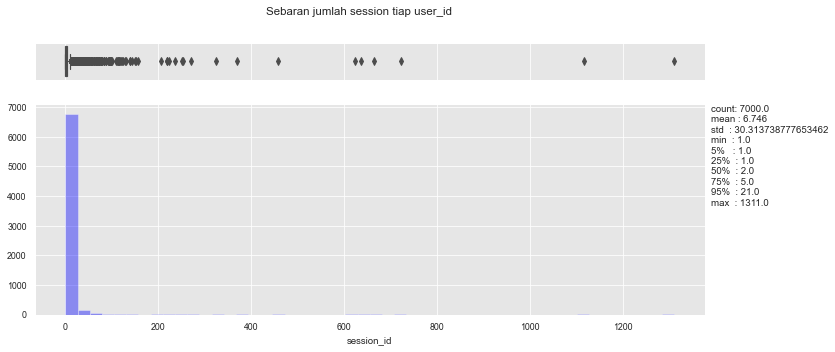

In [43]:
box_hist_plot_2(data_eda['session_id'], 'Sebaran jumlah session tiap user_id')

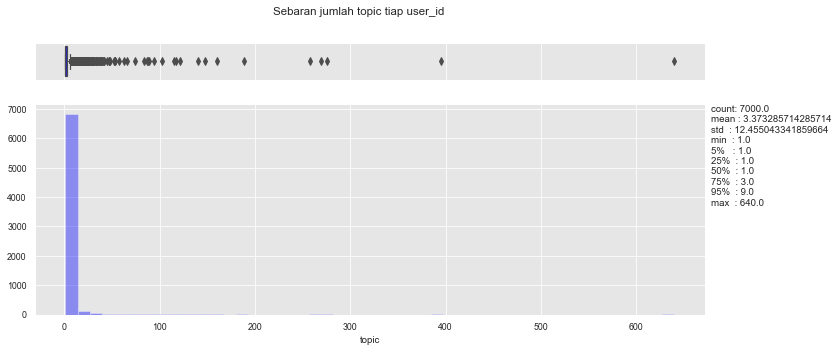

In [44]:
box_hist_plot_2(data_eda['topic'], 'Sebaran jumlah topic tiap user_id')

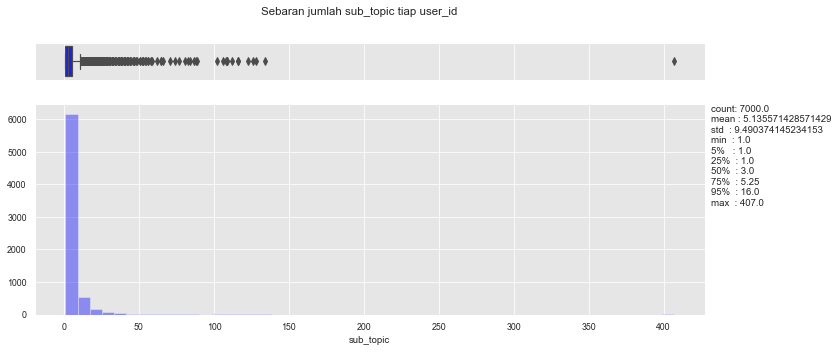

In [45]:
box_hist_plot_2(data_eda['sub_topic'], 'Sebaran jumlah sub_topic tiap user_id')

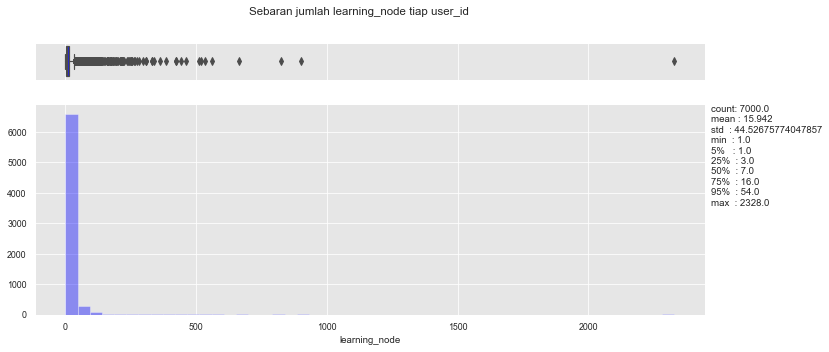

In [46]:
box_hist_plot_2(data_eda['learning_node'], 'Sebaran jumlah learning_node tiap user_id')

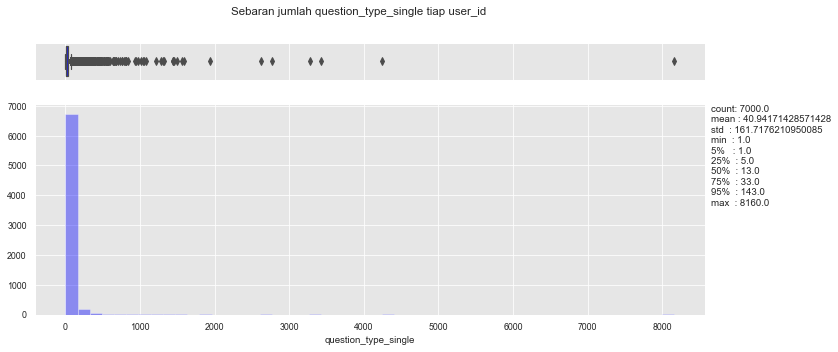

In [48]:
box_hist_plot_2(data_eda['question_type_single'], 'Sebaran jumlah question_type_single tiap user_id')

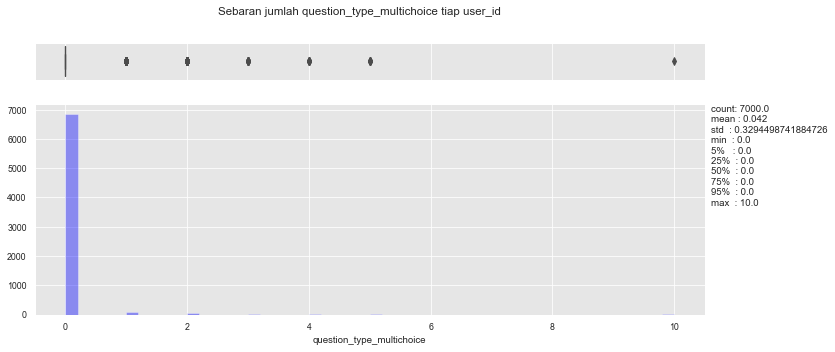

In [49]:
box_hist_plot_2(data_eda['question_type_multichoice'], 'Sebaran jumlah question_type_multichoice tiap user_id')

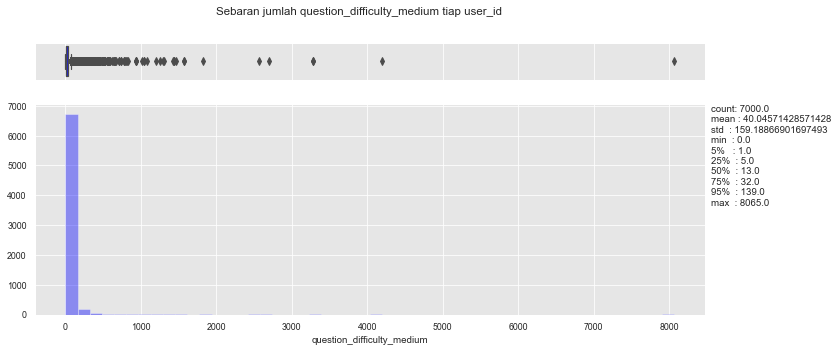

In [57]:
box_hist_plot_2(data_eda['question_difficulty_medium'], 'Sebaran jumlah question_difficulty_medium tiap user_id')

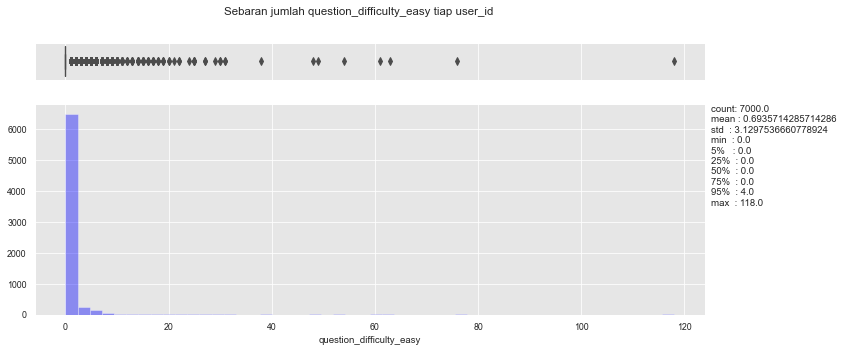

In [58]:
box_hist_plot_2(data_eda['question_difficulty_easy'], 'Sebaran jumlah question_difficulty_easy tiap user_id')

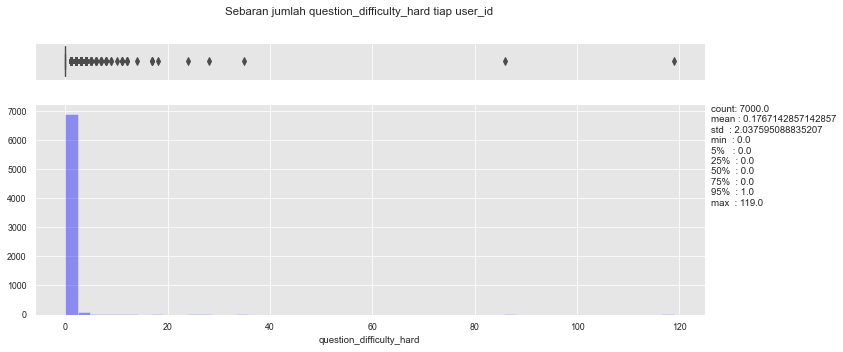

In [59]:
box_hist_plot_2(data_eda['question_difficulty_hard'], 'Sebaran jumlah question_difficulty_hard tiap user_id')

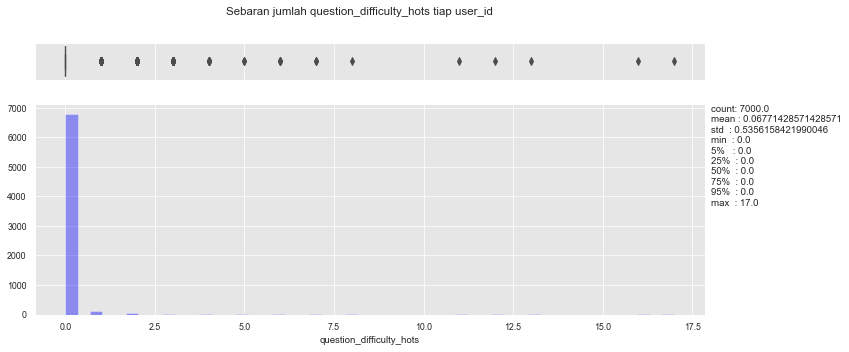

In [60]:
box_hist_plot_2(data_eda['question_difficulty_hots'], 'Sebaran jumlah question_difficulty_hots tiap user_id')

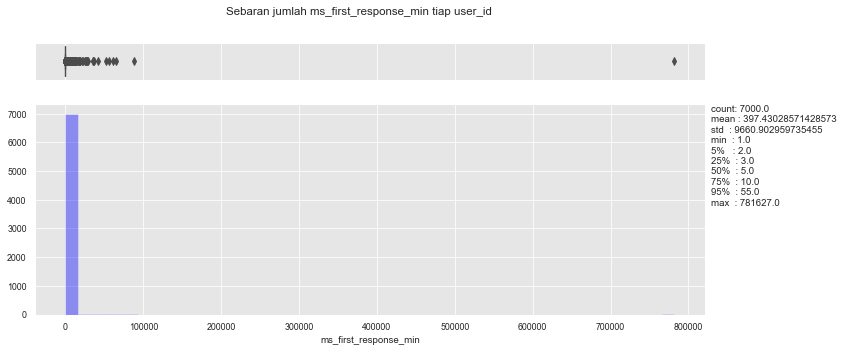

In [61]:
box_hist_plot_2(data_eda['ms_first_response_min'], 'Sebaran jumlah ms_first_response_min tiap user_id')

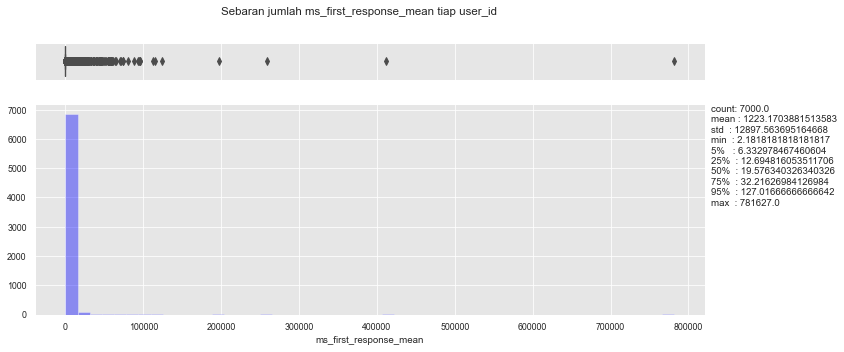

In [62]:
box_hist_plot_2(data_eda['ms_first_response_mean'], 'Sebaran jumlah ms_first_response_mean tiap user_id')

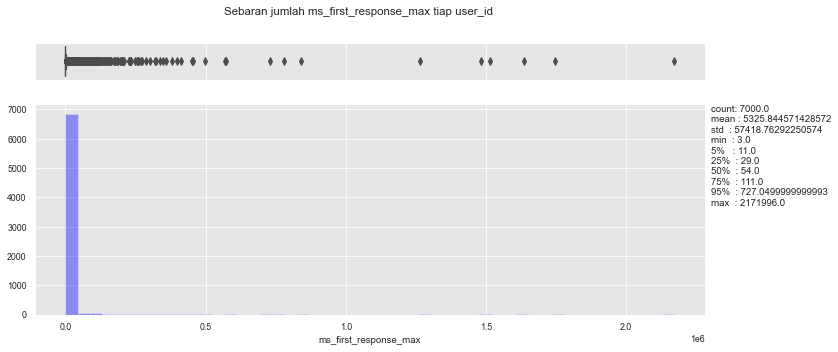

In [63]:
box_hist_plot_2(data_eda['ms_first_response_max'], 'Sebaran jumlah ms_first_response_max tiap user_id')

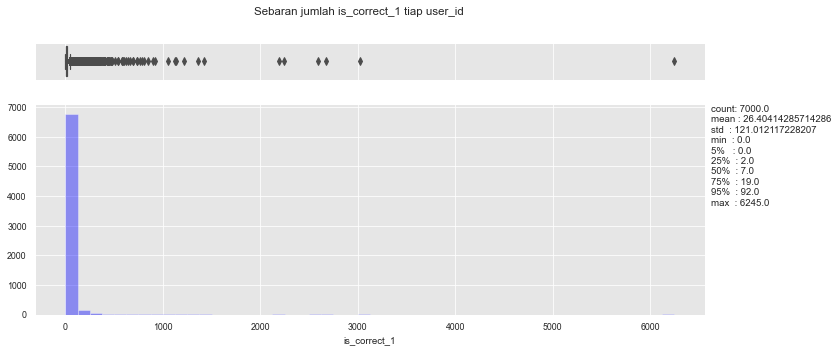

In [71]:
box_hist_plot_2(data_eda['is_correct_1'], 'Sebaran jumlah is_correct_1 tiap user_id')

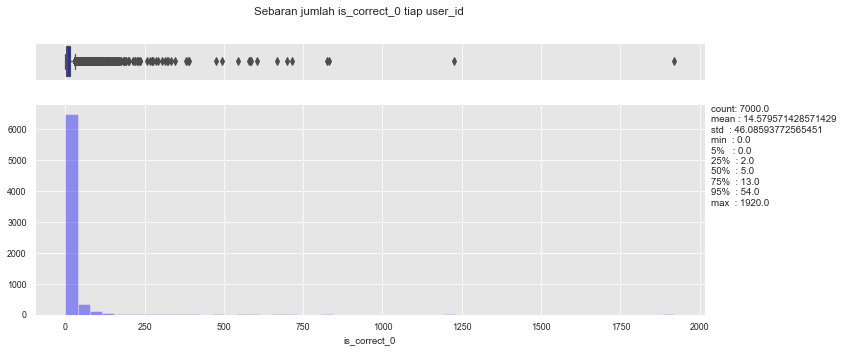

In [72]:
box_hist_plot_2(data_eda['is_correct_0'], 'Sebaran jumlah is_correct_0 tiap user_id')

# 2. Tabel dibagi berdasarkan nilai __is_correct__

In [77]:
df_train = pd.read_csv('20210815_Dataset_RuangGuru_FeatureEng2_cleaned_newver.csv')
df_train

__Tambah Kolom ms_feature_response untuk tiap row__

In [76]:
ms_first_response=[]

#for i in tqdm(range(5)):
for i in tqdm(range(len(data_train.user_id.unique()))):
    df_user = data_train[data_train.user_id==data_train.user_id.unique()[i]]

    for j in range(df_user.shape[0]):
        ms_first_response.append(df_user.ms_first_response.iloc[j])

df_train['ms_first_response']=ms_first_response
df_train

100%|█████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:36<00:00, 193.16it/s]


,Unnamed: 0,Unnamed: 0.1,user_id,session_no,session_question_no,learning_node_question_no,question_number_of_choice,is_new_session_id,is_new_topic,is_new_subtopic,is_new_learningnode,is_new_questionid,is_new_session_question_no,is_new_learning_node_question_no,is_correct,is_new_session_id_n_new_topic,is_new_session_id_n_new_subtopic,is_new_session_id_n_new_learningnode,is_new_session_id_n_new_questionid,is_new_topic_n_new_subtopic,is_new_topic_n_new_learningnode,is_new_topic_n_new_questionid,is_new_subtopic_n_new_learningnode,is_new_subtopic_n_new_questionid,is_new_learning_node_n_questionid,question_type_multi choice,question_type_single choice,question_difficulty_easy,question_difficulty_hard,question_difficulty_hots,question_difficulty_medium,n_topic,n_subtopic,n_learningnode,n_questionid,prob_correct,n_prob_correct,ms_first_response
0,0,0,2348875,1.0,1,1,4,1,1,1,1,1,1,1,0.0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,0.250000,0.250000,18.0
1,1,1,2348875,1.0,2,2,4,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0.250000,0.500000,12.0
2,2,2,2348875,2.0,1,1,4,1,0,0,0,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,2,0.250000,0.250000,11.0
3,3,3,2766044,1.0,1,1,4,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,0.250000,0.250000,47.0
4,4,4,2766044,2.0,1,1,4,1,0,1,1,1,1,1,1.0,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1,2,2,2,0.250000,0.250000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286881,286881,286881,9997990646,56.0,9,1,3,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,24,16,78,129,0.333333,0.333333,10.0
286882,286882,286882,9997990646,56.0,10,2,3,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,24,16,78,129,0.333333,0.666667,3.0
286883,286883,286883,9997990646,57.0,1,1,3,1,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,25,16,79,130,0.333333,0.333333,11.0
286884,286884,286884,9997990646,57.0,2,1,3,0,0,0,0,0,1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,25,16,80,131,0.333333,0.333333,15.0


In [100]:
data_correct = data_train.loc[data_train['is_correct'] == 1]
data_wrong = data_train.loc[data_train['is_correct'] == 0]

In [101]:
def pie_charts(series,feature, title):
    list_data = series[feature].unique().tolist()
    list_num=[]
    for i in range(len(list_data)):
        list_num.append(series.loc[series[feature] == list_data[i]].shape[0])
    
    explodes = [0]*len(list_data)
    
    fig1, ax1 = plt.subplots(figsize=(10,8))
    ax1.pie(list_num, explode = explodes,labels=list_data, autopct='%1.1f%%',
            shadow=False,startangle=90, labeldistance=1.05, textprops={'fontsize': 15})

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title,fontsize=17)
    plt.show()

# Persentase row salah dan benar

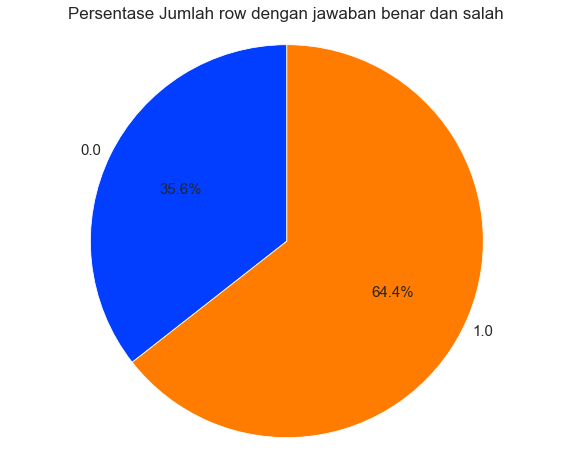

In [102]:
pie_charts(data_train, 'is_correct', 'Persentase Jumlah row dengan jawaban benar dan salah')

In [104]:
data_train.head(2)

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,question_number_of_correct_selected,question_number_of_wrong_selected,ms_first_response,is_correct,row_id
0,2348875,5473538500,1.0,1064573894,6164056362,1683819444,2226271822,single choice,1,1,medium,4,1,0,1,18.0,0.0,0
1,2348875,5473538500,1.0,1064573894,6164056362,1683819444,2226271822,single choice,2,2,medium,4,1,0,1,12.0,0.0,1


# Pie chart untuk kolom beberapa kolom kategorial berdasarkan nilai __is_correct__

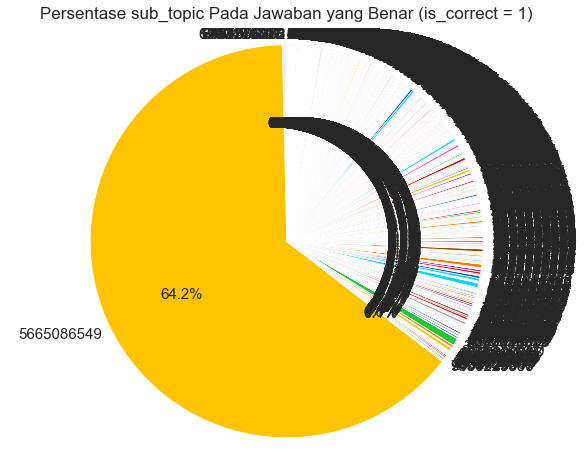

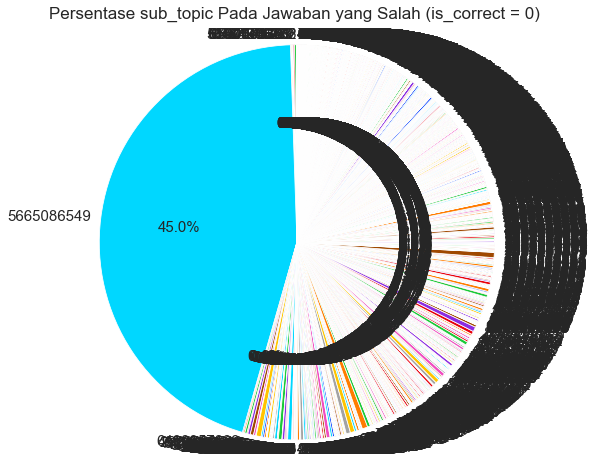

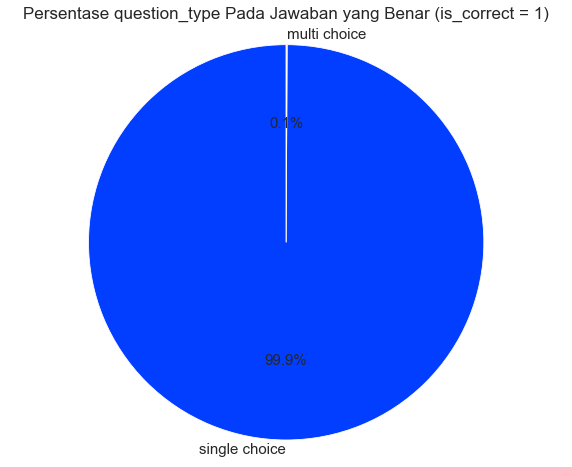

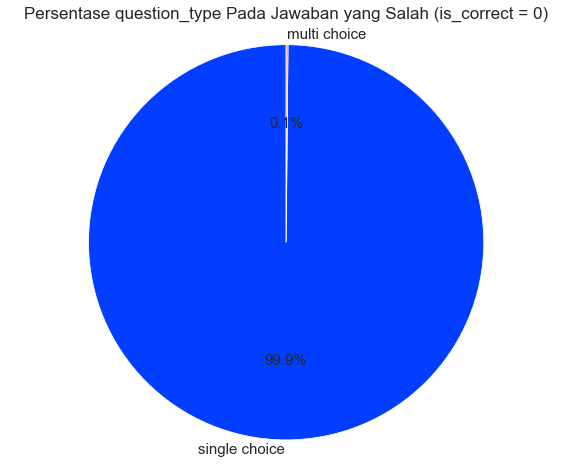

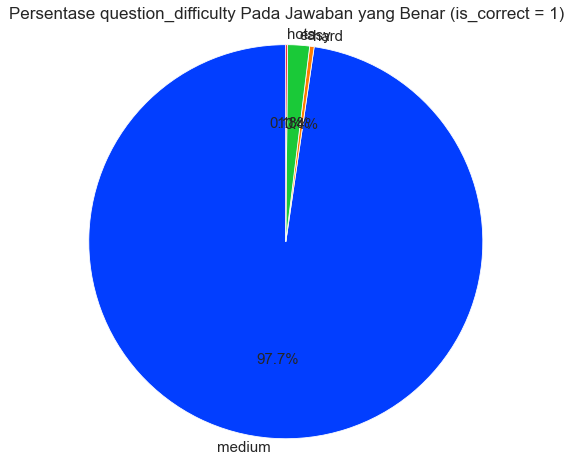

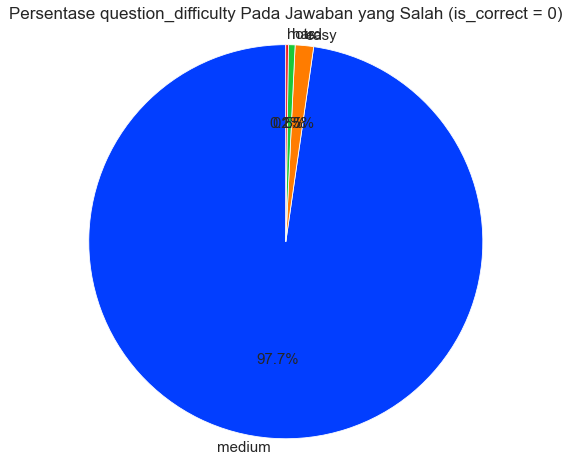

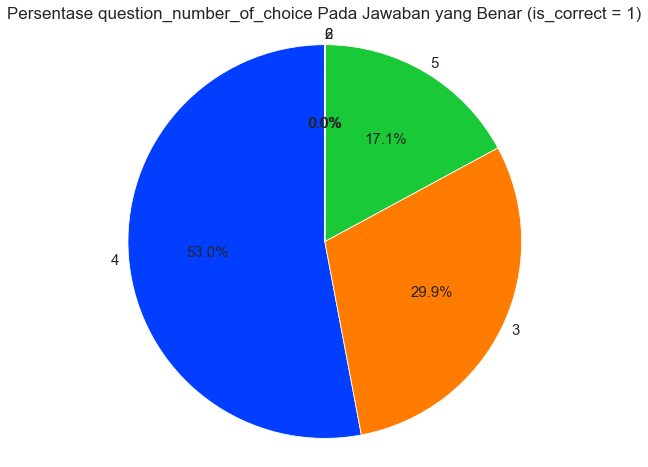

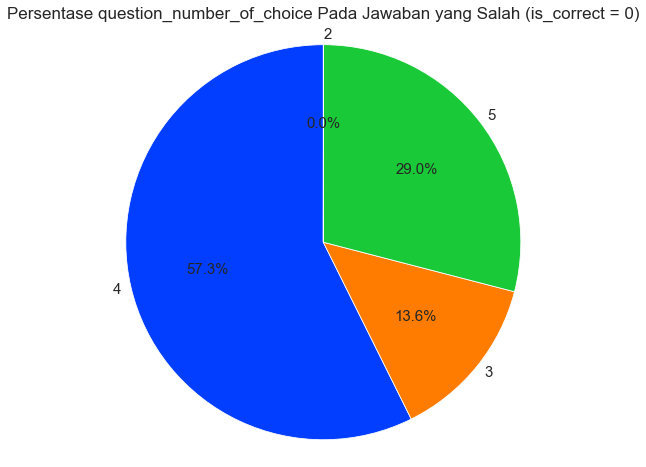

In [107]:
list_column = ['sub_topic','question_type','question_difficulty','question_number_of_choice']

for i in range(len(list_column)):
    pie_charts(data_correct, list_column[i], 'Persentase {} Pada Jawaban yang Benar (is_correct = 1)'.format(list_column[i]))
    pie_charts(data_wrong, list_column[i], 'Persentase {} Pada Jawaban yang Salah (is_correct = 0)'.format(list_column[i]))


## Cek histogram __ms_first_response__ untuk is_correct=1 & is_correct=0 

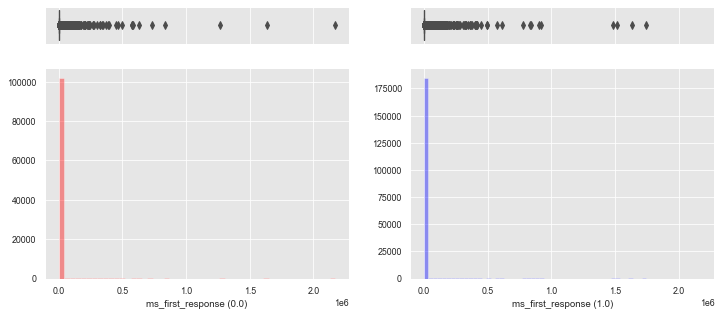

In [116]:
divided_box_hist_plot(data_train['ms_first_response'], data_train['is_correct'])

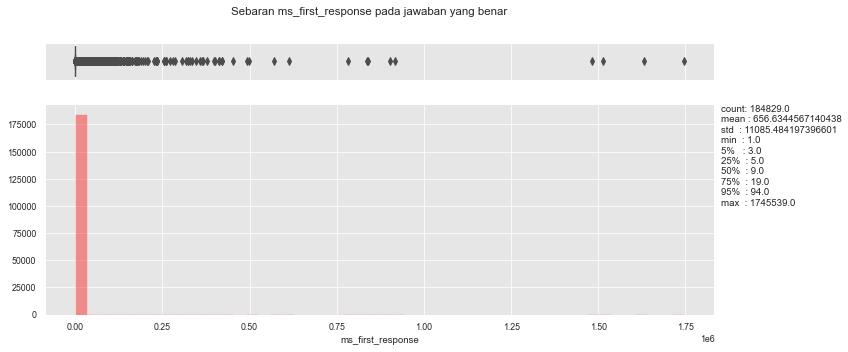

In [117]:
box_hist_plot_1(data_correct['ms_first_response'], 'Sebaran ms_first_response pada jawaban yang benar')

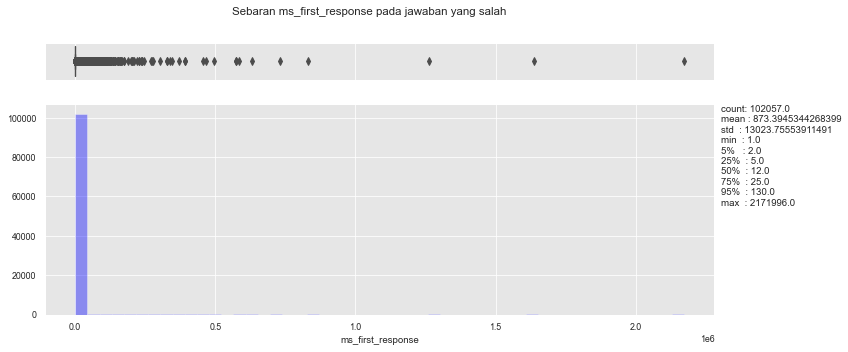

In [118]:
box_hist_plot_2(data_wrong['ms_first_response'], 'Sebaran ms_first_response pada jawaban yang salah')